# Gemini API: Prompting quickstart

This notebook contains examples of how to write and run your first prompts with the Gemini API.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Prompting.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Install the Python SDK

In [13]:
!pip install -q -U google-generativeai

In [14]:
import google.generativeai as genai

## Get your API key

Create your API key with one click in [Google AI Studio](https://aistudio.google.com/app/apikey). Copy and paste it, and come back here.

## Pass your API key to the SDK

You should treat your API key like a password (do not save it in a notebook). You can securely store your key using Colab Secrets.

In Colab, add your key to the secrets manager under the "🔑" in the left panel. Give it the name GOOGLE_API_KEY.

Then, run the below code to read the key and pass it to the SDK.

In [15]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

In [25]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content("Give me python code to sort a list")
print(response.text)

```python
# List of unsorted numbers
unsorted_list = [2, 5, 1, 7, 3, 8, 6, 4]

# Sort the list in ascending order
sorted_list = sorted(unsorted_list)

# Print the sorted list
print(sorted_list)
```


## Use images in your prompt

In [17]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/data/jetpack.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1531k  100 1531k    0     0  5943k      0 --:--:-- --:--:-- --:--:-- 5957k


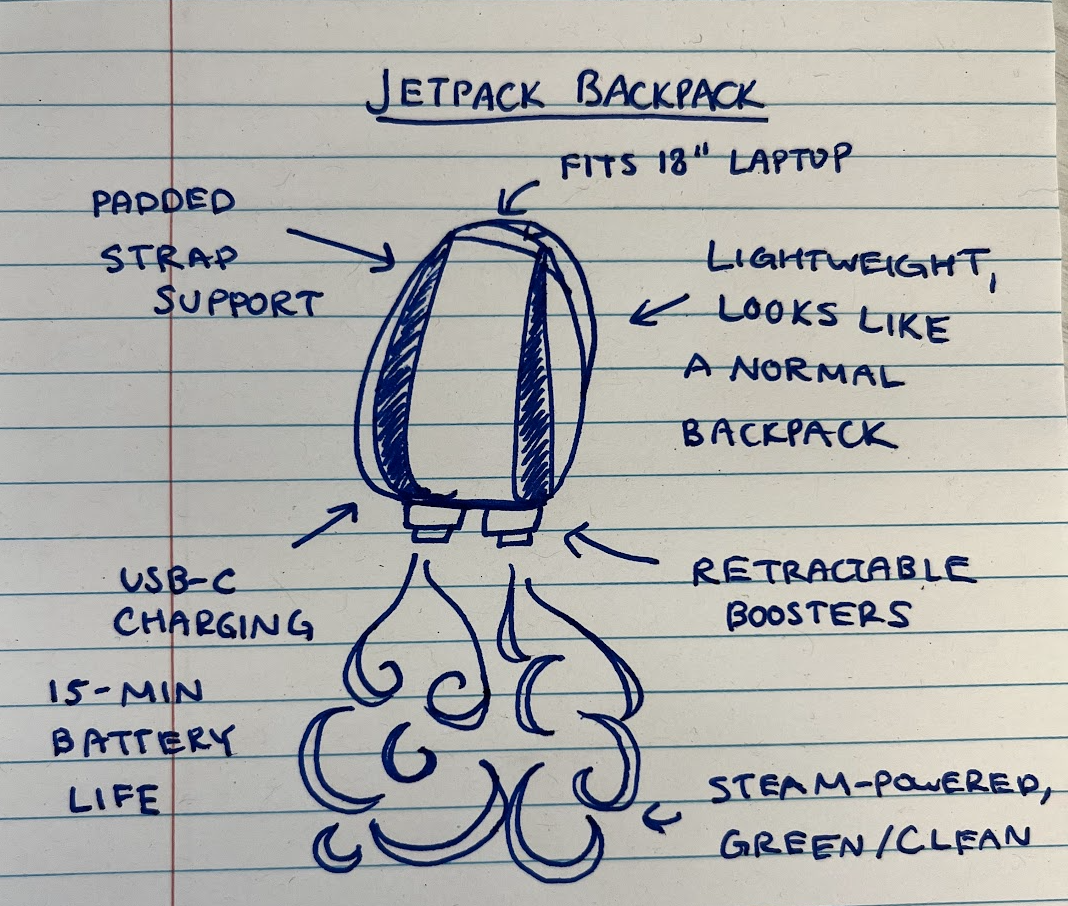

In [18]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [19]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [20]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content([prompt, img])
print(response.text)

 {
 "description": "The Jetpack Backpack is a lightweight backpack that looks like a normal backpack but has retractable boosters that can be used to fly. It has a 15-minute battery life and can carry a laptop up to 18 inches. It also has a USB-C charging port and padded shoulder straps.",
 "features": ["Retractable boosters", "15-minute battery life", "Carries laptops up to 18 inches", "USB-C charging port", "Padded shoulder straps", "Lightweight", "Looks like a normal backpack", "Steam-powered", "Green/clean"]
}


## Have a chat

Gemini enables you to have freeform conversations across multiple turns.

In [21]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

In [22]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

A computer is like a very smart robot that helps us do many things, like playing games, watching videos, and learning new words.


You can see the chat history:

In [23]:
print(chat.history)

[parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer is like a very smart robot that helps us do many things, like playing games, watching videos, and learning new words."
}
role: "model"
]


You can keep sending messages to continue the conversation:

In [24]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the "brain" of the computer, the memory, which stores data and instructions, and the input and output devices, such as the keyboard, mouse, and monitor. The software includes the operating system, which manages the computer's resources, and the application software, which allows the user to perform specific tasks, such as word processing, web browsing, and playing games. When a user enters a command or data into the computer, the CPU fetches the instructions from memory and executes them. The output of the instructions is then stored in memory or sent to an output device.


## Learn more

There's lots more to learn!

* For more fun prompts, check out [Market a Jetback](https://github.com/google-gemini/gemini-api-cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb).

* Check out the [safety quickstart](https://github.com/google-gemini/gemini-api-cookbook/blob/main/quickstarts/Safety.ipynb) next to learn about the Gemini API's configurable safety settings, and what to do if your prompt is blocked.

* For lots more details on using the Python SDK, check out this [detailed quickstart](https://ai.google.dev/tutorials/python_quickstart) on https://ai.google.dev.